# Análise do Preço dos Combustíveis Automotivos no Brasil (2019-2024)

Este notebook, apresenta uma analise exploratória dos preços dos combustiveis no Brasil entre 2020 e 2024, com base nos dados públicos disponibilizados pela ANP. Foram utilizadas as bases semestrais de diferentes anos, estados e tipos de combustíveis.

**Objetivos**
- Consolidar os dados em uma única base tratada;
- Realizar filtragens para a seleção de combustiveis representativos;
- Explorar a variação dos produtos;

## Coleta e Preparação dos Dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os
import glob

sns.set(style='whitegrid')

### Importação e Consolidação dos Dados

In [5]:
caminho = 'base/revendas'
if os.path.exists(caminho):
    print("Diretório Encontrado")
else:
    print("Diretorio não encontrado. Verifique o caminho")

Diretório Encontrado


In [7]:
print(os.listdir(caminho))

['ca-2019-01.xlsx', 'ca-2019-02.xlsx', 'ca-2020-01.xlsx', 'ca-2020-02.xlsx', 'ca-2021-01.xlsx', 'ca-2021-02.xlsx', 'ca-2022-01.xlsx', 'ca-2022-02.xlsx', 'ca-2023-01.xlsx', 'ca-2023-02.xlsx', 'ca-2024-01.xlsx', 'ca-2024-02.xlsx']


In [9]:
dfs = []
for arquivo in os.listdir(caminho):
    if arquivo.endswith('.xlsx'):
        caminho_completo = os.path.join(caminho, arquivo)
        df = pd.read_excel(caminho_completo)
        dfs.append(df)

if dfs:
    df_revenda = pd.concat(dfs, ignore_index=True)
    print('DataFrame concatenado com sucesso')
    print(df_revenda.head())

else:
    print('Nenhum arquivo foi lido')

DataFrame concatenado com sucesso
  Regiao - Sigla Estado - Sigla  Municipio  \
0             SE             SP  GUARULHOS   
1             SE             SP  GUARULHOS   
2             SE             SP  GUARULHOS   
3             SE             SP  GUARULHOS   
4              S             RS     CANOAS   

                                       Revenda      CNPJ da Revenda  \
0                     AUTO POSTO SAKAMOTO LTDA   49.051.667/0001-02   
1                     AUTO POSTO SAKAMOTO LTDA   49.051.667/0001-02   
2                     AUTO POSTO SAKAMOTO LTDA   49.051.667/0001-02   
3                     AUTO POSTO SAKAMOTO LTDA   49.051.667/0001-02   
4  METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA   88.587.589/0001-17   

                Nome da Rua Numero Rua          Complemento      Bairro  \
0  RODOVIA PRESIDENTE DUTRA        S/N  KM 210,5-SENT SP/RJ  BONSUCESSO   
1  RODOVIA PRESIDENTE DUTRA        S/N  KM 210,5-SENT SP/RJ  BONSUCESSO   
2  RODOVIA PRESIDENTE DUTRA        S/

In [11]:
df_revenda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5240904 entries, 0 to 5240903
Data columns (total 16 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Regiao - Sigla     object        
 1   Estado - Sigla     object        
 2   Municipio          object        
 3   Revenda            object        
 4   CNPJ da Revenda    object        
 5   Nome da Rua        object        
 6   Numero Rua         object        
 7   Complemento        object        
 8   Bairro             object        
 9   Cep                object        
 10  Produto            object        
 11  Data da Coleta     datetime64[ns]
 12  Valor de Venda     float64       
 13  Valor de Compra    float64       
 14  Unidade de Medida  object        
 15  Bandeira           object        
dtypes: datetime64[ns](1), float64(2), object(13)
memory usage: 639.8+ MB


### Limpeza e Padronização dos Dados

Removendo colunas desnecessárias, renomeandos colunas e padronizando o nome dos produtos

In [14]:
df_revenda = df_revenda.drop(columns=['Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro', 'Cep'])
df_revenda.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,GASOLINA,2019-01-03,4.199,3.5766,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,ETANOL,2019-01-03,2.899,2.3513,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,DIESEL S10,2019-01-03,3.349,2.8841,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,GNV,2019-01-03,2.439,NaN,R$ / m³,PETROBRAS DISTRIBUIDORA S.A.
4,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,GASOLINA,2019-01-02,4.399,3.8550,R$ / litro,BRANCA


In [16]:
df_revenda.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Regiao - Sigla,5240904,5,SE,2543879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estado - Sigla,5240904,27,SP,1508121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Municipio,5240904,472,SAO PAULO,194454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Revenda,5240904,19789,SIM REDE DE POSTOS LTDA,33380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNPJ da Revenda,5240904,21738,01.420.327/0001-85,1466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Produto,5240904,6,GASOLINA,1417467,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data da Coleta,5240904,NaN,NaN,NaN,2021-12-28 20:16:32.983497984,2019-01-02 00:00:00,2020-04-22 00:00:00,2022-02-02 00:00:00,2023-07-25 00:00:00,2024-12-31 00:00:00,NaN
Valor de Venda,5240904.0,NaN,NaN,NaN,4.953649,1.799,3.889,4.94,5.94,9.79,1.263458
Valor de Compra,537881.0,NaN,NaN,NaN,3.28445,1.5431,2.9229,3.2712,3.714,5.091,0.572493
Unidade de Medida,5240904,2,R$ / litro,5142157,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_revenda['Produto'].unique()

array(['GASOLINA', 'ETANOL', 'DIESEL S10', 'GNV', 'DIESEL',
       'GASOLINA ADITIVADA'], dtype=object)

In [20]:
df_revenda['Ano'] = df_revenda['Data da Coleta'].dt.year
df_revenda['Ano'].unique()

array([2019, 2020, 2021, 2022, 2023, 2024])

In [60]:
df_revenda.columns = df_revenda.columns.str.strip().str.lower().str.replace(' ', '_')
df_revenda.columns

Index(['regiao_-_sigla', 'estado_-_sigla', 'municipio', 'revenda',
       'cnpj_da_revenda', 'produto', 'data_da_coleta', 'valor_de_venda',
       'valor_de_compra', 'unidade_de_medida', 'bandeira', 'ano'],
      dtype='object')

## Análise Exploratória



### Analise por Produto

#### Distribuição de registros por tipo de combustivel

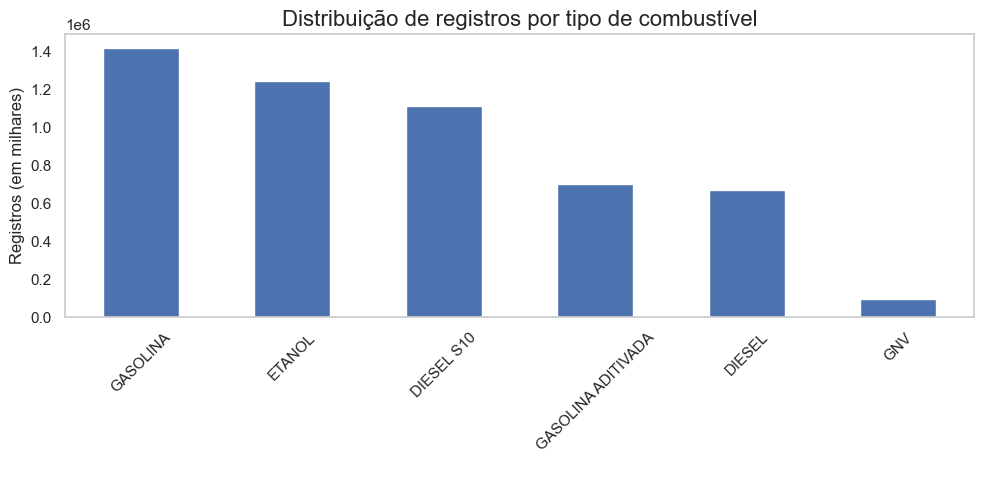

In [150]:
df_revenda['produto'].value_counts().plot(kind='bar', figsize=(10, 5))

plt.title('Distribuição de registros por tipo de combustível', fontsize=16)

plt.ylabel('Registros (em milhares)')
plt.xlabel(' ')
plt.xticks(rotation=45)

plt.grid(False)
plt.tight_layout()
plt.savefig('imagens/distribuicao_combustiveis.png', dpi=300)
plt.show()

Observa-se que a gasolina é o combustível mais recorrente nas contagens de preço. Em contrapartida, o GNV, que é um combustível menos agressivo para o meio ambiente, é o que apresenta o menor número de registros de preços no Brasil no período de 2019 a 2024.

#### Evolução dos preçoes dos combustiveis por ano

In [68]:
evolucao_preco = df_revenda.groupby(['ano', 'produto'])['valor_de_venda'].mean().unstack()
evolucao_preco

produto,DIESEL,DIESEL S10,ETANOL,GASOLINA,GASOLINA ADITIVADA,GNV
ano,,,,,,
2019,3.599621,3.690931,3.167903,4.418652,NaN,3.216014
2020,3.417827,3.508126,3.178214,4.280126,4.587793,3.169041
2021,4.694183,4.740895,4.671044,5.887146,6.037066,3.889377
2022,6.631454,6.734390,4.851730,6.317323,6.472452,5.042826
2023,5.758133,5.859705,4.004911,5.528898,5.710753,4.643232
2024,5.971991,6.031350,4.068235,5.931309,6.120136,4.770535


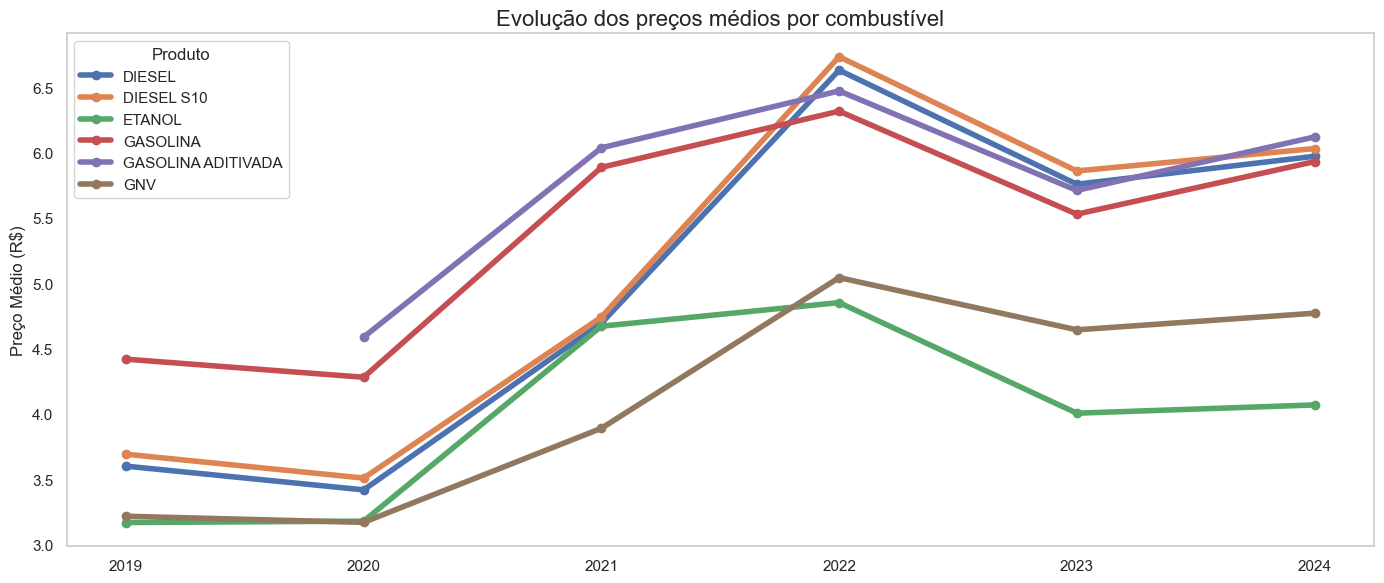

In [153]:
evolucao_preco.plot(kind='line', linewidth=4, marker='o', figsize=(14, 6))

plt.title('Evolução dos preços médios por combustível', fontsize=16)

plt.ylabel('Preço Médio (R$)')
plt.xlabel('')

plt.grid(False)
plt.tight_layout()
plt.legend(title='Produto')
plt.savefig('imagens/evolucao_preco.png', dpi=300)
plt.show()

Verifica-se que o Diesel foi o combustível que apresentou o maior aumento médio de preço entre 2020 e 2022, provavelmente devido aos efeitos da pandemia de Covid-19. Em contraste, o Etanol foi o combustível que sofreu menos variação de preço durante os anos da pandemia.

#### Distribuição dos preços por produto

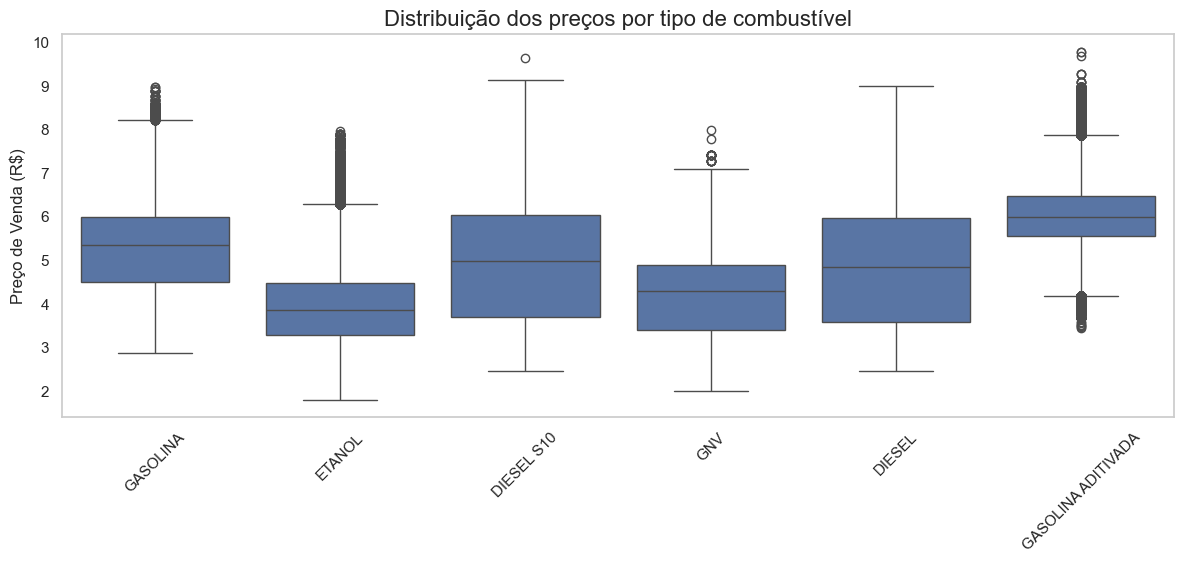

In [145]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_revenda, x='produto', y='valor_de_venda')

plt.title('Distribuição dos preços por tipo de combustível', fontsize=16)

plt.ylabel('Preço de Venda (R$)')
plt.xlabel(' ')
plt.xticks(rotation=45)

plt.grid(False)
plt.tight_layout()
plt.show()

Os outliers observados, principalmente na gasolina e etanol, no gráfico de boxplot podem ser explicados por uma combinação de fatores, incluindo erros de entrada de dados, promoções ou descontos específicos; diferenças regionais nos preços, mudanças no mercado de combustíveis e variações entre os tipos de combustíveis.

### Análise por região

#### Preço médio por produto por região do Brasil

In [97]:
preco_medio_regiao = df_revenda.groupby(['regiao_-_sigla', 'produto'])['valor_de_venda'].mean().unstack()
preco_medio_regiao

produto,DIESEL,DIESEL S10,ETANOL,GASOLINA,GASOLINA ADITIVADA,GNV
regiao_-_sigla,,,,,,
CO,4.952167,5.047556,3.714543,5.358262,6.032301,3.788415
N,5.322227,5.379105,4.499905,5.567442,6.275388,4.120881
NE,4.946714,5.029559,4.317589,5.438776,6.164690,4.067035
S,4.837610,4.907561,4.165669,5.306522,6.015066,4.450933
SE,4.774353,4.956573,3.747065,5.288752,5.988817,4.200787


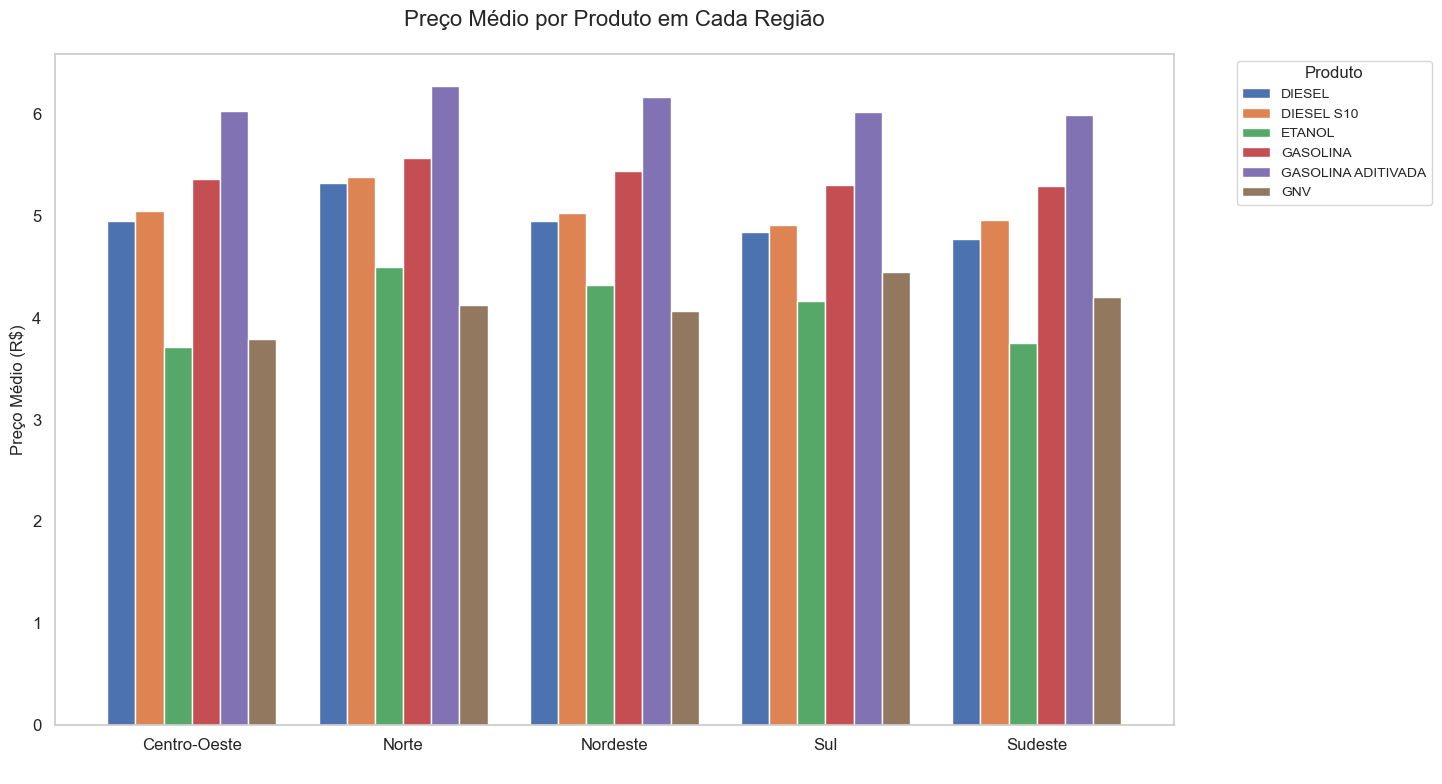

In [155]:
ax = preco_medio_regiao.plot(kind='bar', figsize=(12, 8), width=0.8)

regioes = {
    'N': 'Norte',
    'NE': 'Nordeste',
    'SE': 'Sudeste',
    'S': 'Sul',
    'CO': 'Centro-Oeste'
}

plt.title('Preço Médio por Produto em Cada Região', fontsize=16, pad=20)

plt.xlabel(' ')
plt.ylabel('Preço Médio (R$)', fontsize=12)
plt.xticks(
    ticks=range(len(df_revenda['regiao_-_sigla'].unique())), 
    labels=[regioes.get(sigla, sigla) for sigla in preco_medio_regiao.index],
    fontsize=12,
    rotation=0
)
plt.yticks(fontsize=12)

plt.grid(False)
plt.tight_layout()
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.savefig('imagens/preco_medio_por_regiao.png', dpi=300)
plt.show()


Este gráfico demonstra que a gasolina aditivada apresenta o maior preço médio em todas as regiões do país. Por outro lado, os combustíveis com os menores preços são o Etanol e o GNV, sendo que, nas regiões Sudeste e Centro-Oeste, o Etanol tem, em média, um preço de venda inferior ao do GNV.

#### Distribuição dos combustiveis por região do Brasil

In [103]:
count_produto = pd.crosstab(df_revenda['regiao_-_sigla'], df_revenda['produto'])
count_produto

produto,DIESEL,DIESEL S10,ETANOL,GASOLINA,GASOLINA ADITIVADA,GNV
regiao_-_sigla,,,,,,
CO,69485,92865,118282,121225,47783,1099
N,61311,79722,46149,97970,43900,353
NE,106204,241245,247507,278488,136933,23916
S,128731,192450,162760,241211,142118,15318
SE,304381,505151,666562,678573,331151,58061


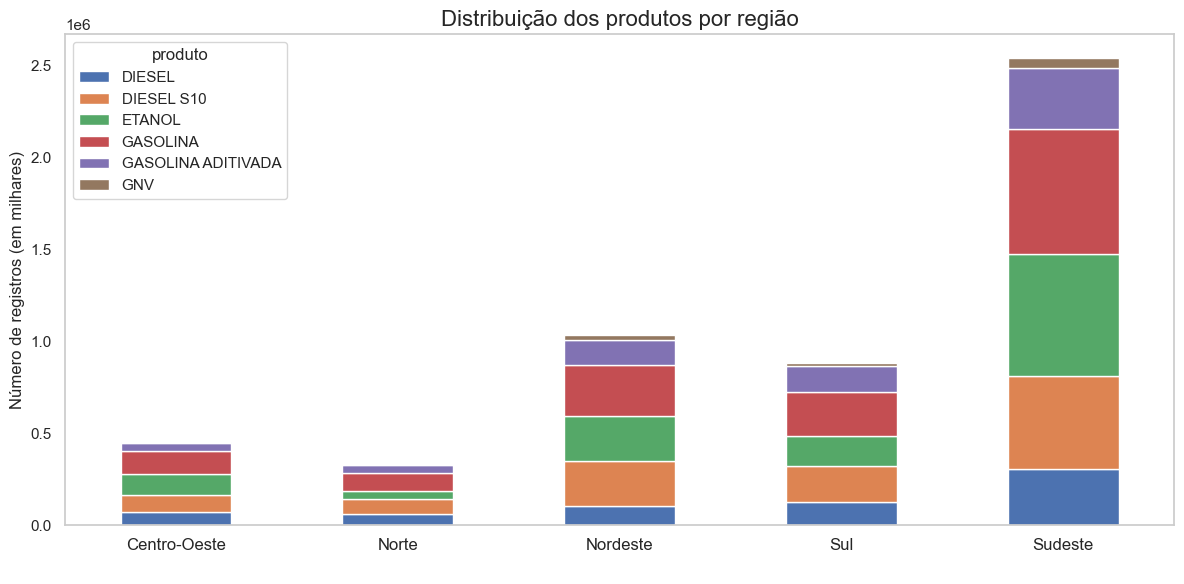

In [105]:
ax = count_produto.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Distribuição dos produtos por região', fontsize=16)

plt.ylabel('Número de registros (em milhares)')
plt.xlabel(' ')
plt.xticks(
    ticks=range(len(df_revenda['regiao_-_sigla'].unique())), 
    labels=[regioes.get(sigla, sigla) for sigla in preco_medio_regiao.index],
    fontsize=12,
    rotation=0
)

plt.grid(False)
plt.tight_layout()
plt.show()

Observa-se nesta imagem que a região Sudeste apresenta a maior distribuição de combustíveis, refletindo sua alta demanda e maior circulação de veículos. Em contraste, a região Norte, provavelmente devido a características geográficas e menores índices de mobilidade, apresenta uma distribuição de combustíveis consideravelmente inferior. É interessante notar que a distribuição total de combustíveis na região Norte é praticamente equivalente à distribuição de diesel na região Sudeste, o que sugere uma concentração de vendas mais específica e limitada no Norte.

### Análise por bandeira

#### Top 10 bandeiras mais presentes

In [110]:
top_presente = df_revenda['bandeira'].value_counts(ascending=False).head(10)
top_presente

bandeira
BRANCA                          1830035
IPIRANGA                         972021
RAIZEN                           809687
VIBRA ENERGIA                    453895
PETROBRAS DISTRIBUIDORA S.A.     436141
VIBRA                            275795
ALESAT                           128670
SABBÁ                             60604
ATEM' S                           25806
RAIZEN MIME                       23969
Name: count, dtype: int64

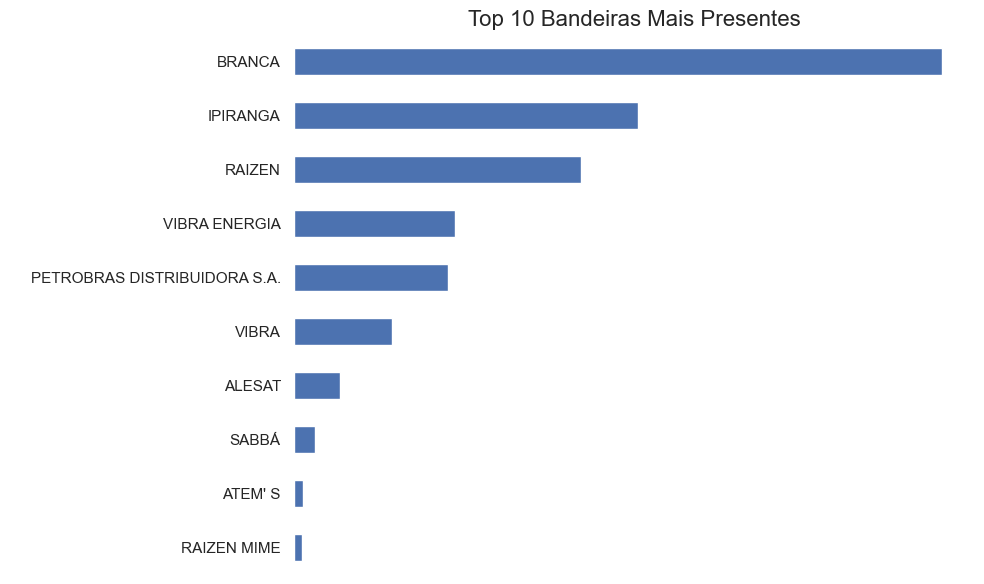

In [112]:
ax = top_presente.plot(kind='barh', figsize=(10, 6))

plt.title('Top 10 Bandeiras Mais Presentes', fontsize=16)
ax.invert_yaxis() 
plt.xticks([])
plt.ylabel(' ')

plt.box(False)
plt.grid(False)
plt.tight_layout()
plt.show()

Conforme definição da ANP, um posto de combustíveis bandeirado é aquele que escolhe exibir a marca comercial de um distribuidor, comprometendo-se a vender exclusivamente os combustíveis fornecidos por esse distribuidor. Por outro lado, o posto de bandeira branca opta por não exibir qualquer marca comercial de distribuidora, mantendo independência em relação aos fornecedores. Dessa forma, nota-se nessa imagem que a maioria dos postos de combustíveis no Brasil opta por operar sem exibir a bandeira de um distribuidor específico.

#### Top 10 bandeiras com maiores preços

In [115]:
bandeira_maior_preco = df_revenda.groupby('bandeira')['valor_de_venda'].mean().sort_values(ascending=False).head(10)
bandeira_maior_preco

bandeira
PETRONAC            6.640000
SANTA LUCIA         6.025070
RDP ENERGIA         5.883158
VIBRA ENERGIA       5.759921
SUL COMBUSTÍVEIS    5.700762
FOGAS               5.692973
AMAZONGÁS           5.686923
ALE                 5.628044
VIBRA               5.621918
AIR BP              5.565102
Name: valor_de_venda, dtype: float64

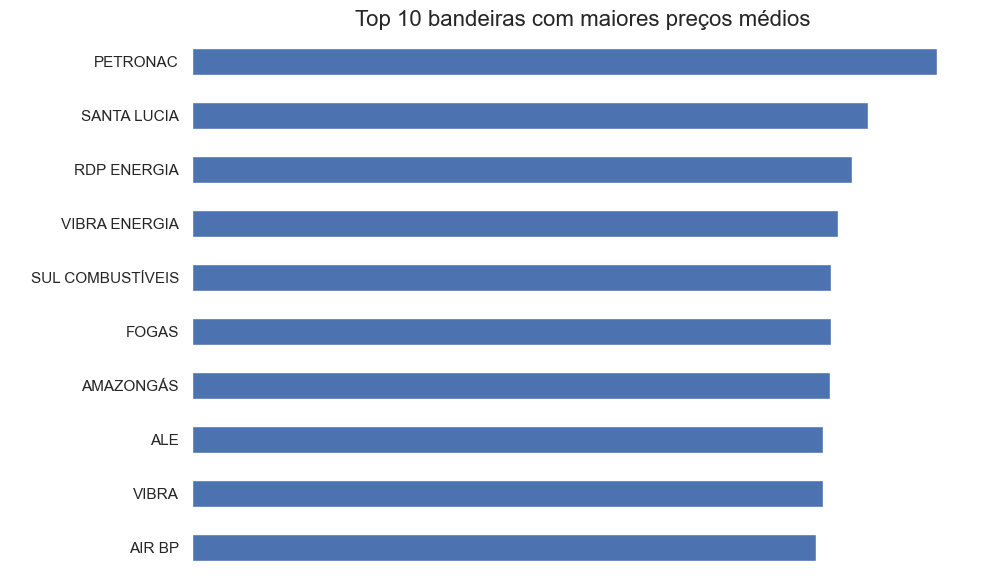

In [117]:
ax = bandeira_maior_preco.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 bandeiras com maiores preços médios', fontsize=16)

ax.invert_yaxis() 
plt.xticks([])
plt.ylabel(' ')

plt.box(False)
plt.grid(False)
plt.tight_layout()
plt.show()

Observa-se que, embora os postos de bandeira branca sejam a maioria no país, eles não apresentam a maior média de preços. As bandeiras mais presentes no Brasil, com os preços de venda mais elevados, são as da Vibra.

### Análise Econômica

#### Calculo da margem de lucro

#### Média da margem de lucro por produto

In [123]:
df_revenda.isna().sum()

regiao_-_sigla             0
estado_-_sigla             0
municipio                  0
revenda                    0
cnpj_da_revenda            0
produto                    0
data_da_coleta             0
valor_de_venda             0
valor_de_compra      4703023
unidade_de_medida          0
bandeira                   0
ano                        0
dtype: int64

In [125]:
df_revenda[df_revenda['valor_de_compra'].isna()]['produto'].unique()

array(['GNV', 'GASOLINA', 'ETANOL', 'DIESEL', 'DIESEL S10',
       'GASOLINA ADITIVADA'], dtype=object)

In [127]:
df_revenda_clean = df_revenda.dropna(subset=['valor_de_compra']).copy()

In [129]:
df_revenda_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537881 entries, 0 to 1642148
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   regiao_-_sigla     537881 non-null  object        
 1   estado_-_sigla     537881 non-null  object        
 2   municipio          537881 non-null  object        
 3   revenda            537881 non-null  object        
 4   cnpj_da_revenda    537881 non-null  object        
 5   produto            537881 non-null  object        
 6   data_da_coleta     537881 non-null  datetime64[ns]
 7   valor_de_venda     537881 non-null  float64       
 8   valor_de_compra    537881 non-null  float64       
 9   unidade_de_medida  537881 non-null  object        
 10  bandeira           537881 non-null  object        
 11  ano                537881 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(8)
memory usage: 51.3+ MB


### Observação sobre o Valor de Compra

Observa-se que a coluna "Valor de Compra" possui muitos valores nulos, comprometendo 90% dos dados levantado no periodo. De acordo com os metadados disponibilizados pela ANP, essa serie foi descontinuada a parte de setembro 2020. Sendo assim, para não prejudicar as demais análises (Produto, Região, Bandeira), o dataset completo foi mantido inicialmente.

A limpeza para remoção de valores nulos foi realizada **apenas** para a etapa de Análise Econômica da margem de lucro, onde a existência do "Valor de Compra" é imprescindível.

In [132]:
df_revenda_clean['margem'] = df_revenda_clean['valor_de_venda'] - df_revenda_clean['valor_de_compra']
margem_lucro = df_revenda_clean.groupby('produto')['margem'].mean().sort_values(ascending=False)
margem_lucro

produto
GNV           0.900810
GASOLINA      0.497271
DIESEL S10    0.442147
DIESEL        0.416537
ETANOL        0.404190
Name: margem, dtype: float64

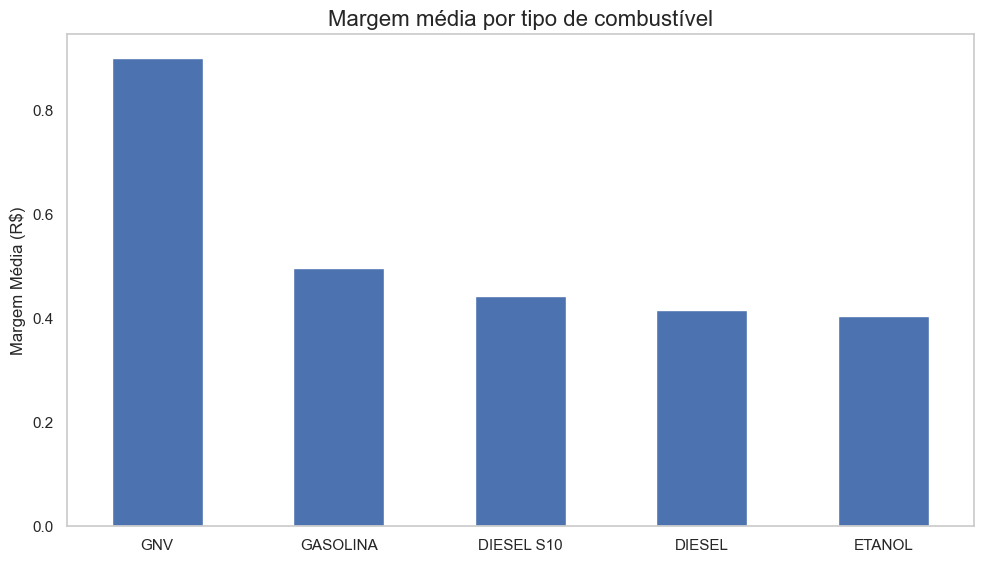

In [157]:
ax = margem_lucro.plot(kind='bar', figsize=(10, 6))

plt.title('Margem média por tipo de combustível', fontsize=16)

plt.ylabel('Margem Média (R$)')
plt.xlabel(' ')
plt.xticks(rotation=0)

plt.grid(False)
plt.tight_layout()
plt.savefig('imagens/margem_media_por_combustivel.png', dpi=300)
plt.show()

Neste caso, observa-se que, até agosto de 2020, o combustível que oferecia a maior margem de lucro para os revendedores era o GNV.


#### Distribuição da margem de lucro

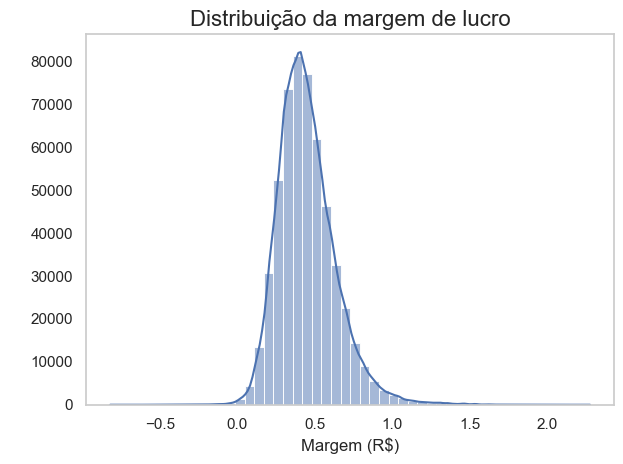

In [137]:
sns.histplot(df_revenda_clean['margem'].dropna(), bins=50, kde=True)
plt.title('Distribuição da margem de lucro', fontsize=16)
plt.ylabel(' ')
plt.xlabel('Margem (R$)')
plt.grid(False)
plt.tight_layout()
plt.show()

## Conclusão

A análise dos dados de preços de combustíveis no Brasil entre 2019 e 2024 revelou padrões interessantes de comportamento de mercado:

- A gasolina comum foi o combustível mais vendido e o que mais impactou a média de preços nacional.
- Durante a pandemia (2020–2022), o Diesel sofreu o maior aumento percentual de preço.
- A região Sudeste apresentou a maior distribuição de combustíveis e também preços mais elevados.
- Os postos de bandeira branca dominam em quantidade, mas não necessariamente praticam os maiores preços.
- Até 2020, o GNV se destacou como o combustível com a maior margem de lucro média para os revendedores.

Esses insights demonstram o impacto de fatores econômicos e regionais no mercado de combustíveis brasileiro, além da importância de políticas públicas e estratégias de mercado no setor.